In [2]:
#import the usual libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("coches_dataset2.csv.csv")

df = df.drop(["feature_0","feature_1", "feature_2", "feature_3", "feature_4",
              "feature_5", "feature_5", "feature_6", "feature_7", "feature_8", 
              "feature_8", "feature_9", "location_region"], axis = 1)

df['duration_listed'].fillna((df['duration_listed'].mean()), inplace=True)
df['engine_capacity'].fillna((df['engine_capacity'].mean()), inplace=True)

#create a new dataframe just with audi cars and the quantitative variables
df_rs = pd.DataFrame()
odometer = df.iloc[9478:12040, 4].astype(str).astype(float)
year = df.iloc[9478:12040,5].astype(str).astype(float)
eng_cap = df.iloc[9478:12040, 9].astype(str).astype(float)
price = df.iloc[9478:12040, 14].astype(str).astype(float)
duration = df.iloc[9478:12040, 18].astype(str).astype(float)
photos = df.iloc[9478:12040, 16].astype(str).astype(float)
counter = df.iloc[9478:12040, 17].astype(str).astype(float)


df_rs['odometer_value'] = odometer
df_rs['year_produced'] = year
df_rs['engine_capacity'] = eng_cap
df_rs['price_usd'] = price
df_rs['duration_listed'] = duration
df_rs['nomber_of_photos'] = photos
df_rs['up_counter'] = counter


df_rs


,odometer_value,year_produced,engine_capacity,price_usd,duration_listed,nomber_of_photos,up_counter
9478,294000.0,2004.0,1.4,3100.0,5.0,23.0,5.0
9479,95000.0,2017.0,1.5,18700.0,9.0,12.0,8.0
9480,123456.0,1997.0,1.8,700.0,0.0,5.0,1.0
9481,250000.0,2008.0,1.6,4650.0,15.0,10.0,13.0
9482,65000.0,2015.0,1.6,14150.0,58.0,8.0,34.0
...,...,...,...,...,...,...,...
12035,300000.0,1996.0,2.0,1350.0,200.0,7.0,22.0
12036,350000.0,2000.0,1.8,2250.0,85.0,6.0,1.0
12037,324000.0,1992.0,1.6,210.0,85.0,4.0,1.0
12038,460000.0,1997.0,1.4,500.0,96.0,7.0,1.0


Text(0, 0.5, 'price')

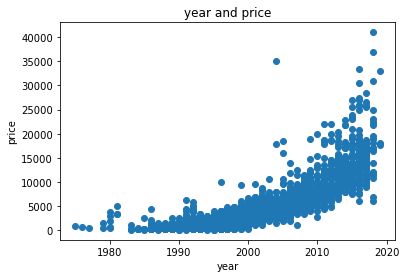

In [3]:
#plot the correlation that exist between the year and the price
plt.scatter(df_rs['year_produced'], df_rs['price_usd'])
plt.title('year and price')
plt.xlabel('year')
plt.ylabel('price')


Text(0, 0.5, 'price')

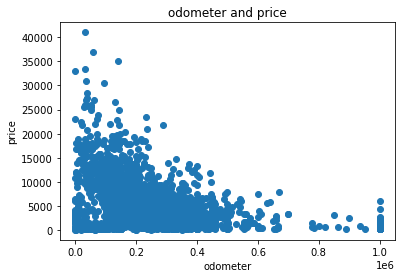

In [4]:
#now, plot the correlation between the mileage and the price
plt.scatter(df_rs['odometer_value'], df_rs['price_usd'])
plt.title('odometer and price')
plt.xlabel('odometer')
plt.ylabel('price')


Text(0, 0.5, 'price')

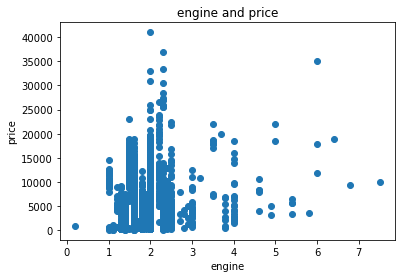

In [5]:
#finally plot the correlation between the engine capacity and the price
plt.scatter(df_rs['engine_capacity'], df_rs['price_usd'])
plt.title('engine and price')
plt.xlabel('engine')
plt.ylabel('price')


In [6]:
#create another dataframe with the row of the database with the missing value on the price
df_row = pd.DataFrame()


df_row = df.iloc[12041, [4,5,9,14,16,17,18]].astype(str).astype(float)
df_row["odometer_value"] = df_row["odometer_value"].astype(str).astype(float)
df_row["year_produced"] = df_row["year_produced"].astype(str).astype(float)
df_row["engine_capacity"] = df_row["engine_capacity"].astype(str).astype(float)
df_row["price_usd"] = df_row["price_usd"].astype(str).astype(float)
df_row["duration_listed"] = df_row["duration_listed"].astype(str).astype(float)

df_row["price_usd"] = np.nan #fill the price with NaN

df_row

odometer_value      58678.0
year_produced        1996.0
engine_capacity         1.8
price_usd               NaN
number_of_photos       23.0
up_counter              1.0
duration_listed       103.0
Name: 12041, dtype: float64

In [7]:
#compute the similarity with the pearson method of the df_rs dataframe
similarity = df_rs.corrwith(df_row, axis=1, method='pearson')

similarity


9478     0.999660
9479     0.999926
9480     0.999856
9481     0.999689
9482     0.999995
           ...   
12035    0.999650
12036    0.999630
12037    0.999641
12038    0.999593
12039    0.999653
Length: 2562, dtype: float64

In [8]:
commonItems = (~df_rs.isna()) & (~df_row.isna())
nCommon = commonItems.sum(axis = 1)

minItemsCommon = 3.9

# Get the indices of users with whom we have more than minItemsCommon items in common with the query one
idx = nCommon.index[nCommon > minItemsCommon]

#keep only the users that have more than minItemsCommon with the query
similarity = similarity.loc[idx]

topN = 3

similarity.sort_values(ascending = False, inplace = True)
idx = similarity.index[:topN] # get the indices of the top N most similar users

m = "price_usd" #The variable we are interested in predicting the price 

# initialise two variables in which we will hold the sums of the nominator and the demoninator of our formula
sum_nom = sum_denom = 0 

# Loop through the list of similar users
for u in idx:
    user_df_rs = df_rs.loc[u] # the row of price corresponding to car u
    print("\nuser:", u, "Similarity: ", similarity[u])

    # Only use the cars that have the price
    if ~(user_df_rs.isna()[m]): 
       
        print("Have a price of: ", user_df_rs[m])        
        
        sum_nom = sum_nom + similarity[u]*(user_df_rs[m]) # Nominator
        sum_denom = sum_denom + similarity[u] # Denominator

    else:
        print("Has not seen the movie. Ignore.")
        
    
    df_row[m] = df_row.mean() + sum_nom / sum_denom
    
    print("recommended price: ", df_row['price_usd']/10)


user: 10407 Similarity:  0.999999820387827
Have a price of:  9200.0
recommended price:  1933.3800000000003

user: 11750 Similarity:  0.9999996843820245
Have a price of:  600.0
recommended price:  1634.8086006698263

user: 10795 Similarity:  0.9999995125032649
Have a price of:  12500.0
recommended price:  1845.4888266955481
